In [1]:
#OpenCV module
import cv2
#os module for reading training data directories and paths
import os
#numpy to convert python lists to numpy arrays as it is needed by OpenCV face recognizers
import numpy as np

import matplotlib.pyplot as plt


In [2]:
def detect_face(colored_img):
 #just making a copy of image passed, so that passed image is not changed 
 img_copy = colored_img.copy()          
 
 #convert the test image to gray image as opencv face detector expects gray images
 gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)     
 scaleFactor = 1.1
 #plt.imshow(gray, cmap='gray');
 f_cascade = cv2.CascadeClassifier('detection/data/lbpcascade_frontalface_improved.xml')
    
 #let's detect multiscale (some images may be closer to camera than others) images
 faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
 print('Faces found: ', len(faces))
 
 #go over list of faces and draw them as rectangles on original colored img
 if (len(faces) == 0):
    return None, None;

 #under the assumption that there will be only one face,
 #extract the face area
 (x, y, w, h) = faces[0]

 
 return gray[y:y+w, x:x+h], faces[0]

In [3]:
#this function will read all persons' training images, detect face from each image
#and will return two lists of exactly same size, one list 
#of faces and another list of labels for each face
def prepare_training_data(data_folder_path):
 
#------STEP-1--------
    #get the directories (one directory for each subject) in data folder
    dirs = os.listdir(data_folder_path)
     
    #list to hold all subject faces
    faces = []
    #list to hold labels for all subjects
    labels = []

    #let's go through each directory and read images within it
    for dir_name in dirs:

        #our subject directories start with letter 's' so
        #ignore any non-relevant directories if any
        if not dir_name.startswith("s"):
            continue;

        #------STEP-2--------
        #extract label number of subject from dir_name
        #format of dir name = slabel
        #, so removing letter 's' from dir_name will give us label
        label = int(dir_name.replace("s", ""))

        #build path of directory containing images for current subject subject
        #sample subject_dir_path = "training-data/s1"
        subject_dir_path = data_folder_path + "/" + dir_name

        #get the images names that are inside the given subject directory
        subject_images_names = os.listdir(subject_dir_path)

        #------STEP-3--------
        #go through each image name, read image, 
        #detect face and add face to list of faces
        for image_name in subject_images_names:

            #ignore system files like .DS_Store
            if image_name.startswith("."):
                continue;

            #build image path
            #sample image path = training-data/s1/1.pgm
            image_path = subject_dir_path + "/" + image_name

            #read image
            image = cv2.imread(image_path)

            #display an image window to show the image 
            cv2.imshow("Training on image...", image)
            cv2.waitKey(100)

            #detect face
            face, rect = detect_face(image)

            #------STEP-4--------
            #for the purpose of this tutorial
            #we will ignore faces that are not detected
            if face is not None:
                #add face to list of faces
                faces.append(face)
                #add label for this face
                labels.append(label)

    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()

    return faces, labels

In [4]:
print('hello')

hello


In [5]:
#let's first prepare our training data
#data will be in two lists of same size
#one list will contain all the faces
#and the other list will contain respective labels for each face
print("Preparing data...")
faces, labels = prepare_training_data("training-data")
print("Data prepared")
 
#print total faces and labels
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Preparing data...
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  0
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Data prepared
Total faces:  11
Total labels:  11


In [6]:
#create our LBPH face recognizer 
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

#or use EigenFaceRecognizer by replacing above line with 
#face_recognizer = cv2.face.createEigenFaceRecognizer()

#or use FisherFaceRecognizer by replacing above line with 
#face_recognizer = cv2.face.createFisherFaceRecognizer()

face_recognizer.train(faces, np.array(labels))

In [7]:
#function to draw rectangle on image 
#according to given (x, y) coordinates and 
#given width and heigh
def draw_rectangle(img, rect):
 (x, y, w, h) = rect
 cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
 
#function to draw text on give image starting from
#passed (x, y) coordinates. 
def draw_text(img, text, x, y):
 cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

In [8]:
#this function recognizes the person in image passed
#and draws a rectangle around detected face with name of the 
#subject
def predict(test_img):
    #make a copy of the image as we don't want to change original image
    if test_img is None:
        return;
    img = test_img.copy()
    #detect face from the image
    face, rect = detect_face(img)

    #predict the image using our face recognizer 
    label= face_recognizer.predict(face)
    print(label)
    #get name of respective label returned by face recognizer
    label_text = subjects[label[0]]

    #draw a rectangle around face detected
    draw_rectangle(img, rect)
    #draw name of predicted person
    draw_text(img, label_text, rect[0], rect[1]-5)

    return img

Predicting images...
Faces found:  1
(1, 0.0)
Faces found:  1
(2, 122.5779544079957)
Prediction complete


-1

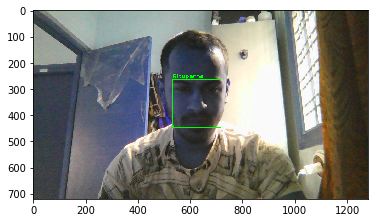

In [10]:
subjects = ["", "Rituparna", "Elvis Presley"]
print("Predicting images...")

#load test images
test_img1 = cv2.imread("training-data/test1.jpeg")
test_img2 = cv2.imread("training-data/test2.jpg")

#perform a prediction
predicted_img1 = predict(test_img1)
predicted_img2 = predict(test_img2)

print("Prediction complete")

#display both images
#cv2.imshow(subjects[1], predicted_img1)
#cv2.imshow(subjects[2], predicted_img2)
plt.imshow(predicted_img1);
#plt.imshow(predicted_img2);

cv2.waitKey(0)
#cv2.destroyAllWindows()